In [54]:
import numpy as np
import pandas as pd

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [55]:
from google.colab import drive
drive.mount('/content/gdrive')

path = 'gdrive/My Drive/CSP554/Project/2015.csv'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [56]:
pip install pyspark

In [57]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [58]:
df=spark.read.csv(path, header=True, inferSchema=True)

In [59]:
df.show(5)

+-----------+--------------+--------------+---------------+--------------+------------------------+-------+------------------------+-------+-----------------------------+----------+-----------------+
|    Country|        Region|Happiness Rank|Happiness Score|Standard Error|Economy (GDP per Capita)| Family|Health (Life Expectancy)|Freedom|Trust (Government Corruption)|Generosity|Dystopia Residual|
+-----------+--------------+--------------+---------------+--------------+------------------------+-------+------------------------+-------+-----------------------------+----------+-----------------+
|Switzerland|Western Europe|             1|          7.587|       0.03411|                 1.39651|1.34951|                 0.94143|0.66557|                      0.41978|   0.29678|          2.51738|
|    Iceland|Western Europe|             2|          7.561|       0.04884|                 1.30232|1.40223|                 0.94784|0.62877|                      0.14145|    0.4363|          2.70201|


Mean happiness score: 5.375734177215189
Standard deviation of happiness score: 1.1413809336358134


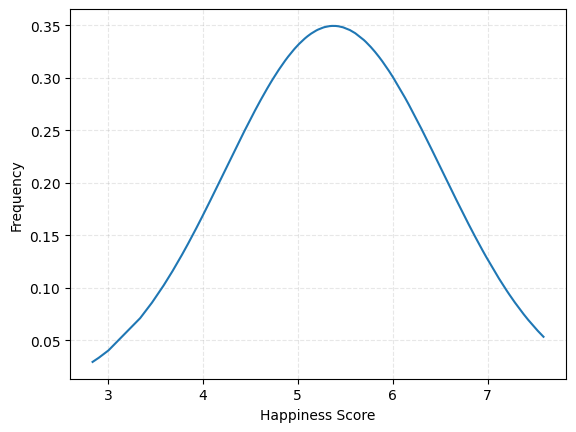

In [60]:
#Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

scores =df.rdd.map(lambda df: df["Happiness Score"]).collect()
# Calculating mean and Stdev of AGW
df_mean = np.mean(scores)
df_std = np.std(scores)

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(sorted(scores), df_mean, df_std)

print("Mean happiness score:", df_mean)
print("Standard deviation of happiness score:", df_std)

# Drawing a graph
plt.plot(sorted(scores), pdf)
#plt.xlim([30,70])
plt.xlabel("Happiness Score") # , size=12)
plt.ylabel("Frequency") #, #size=12)
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

Mean happiness score: 0.7085454299743231
Standard deviation of happiness score: 0.15043903171685954


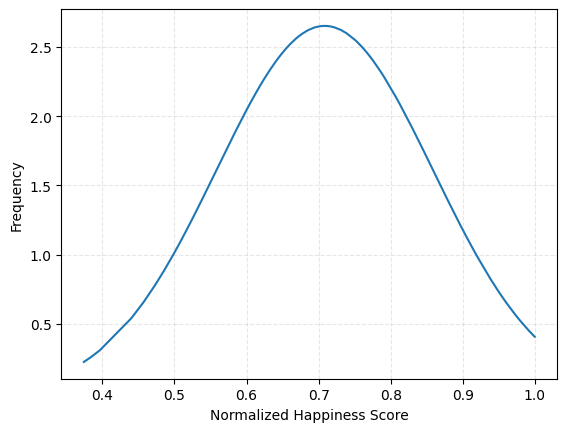

In [61]:
import sklearn
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.feature import Normalizer

v = Vectors.dense(range(3))
nor = Normalizer(1)
scores = np.array(scores)
normalized_score = scores / max(scores)

# Calculating mean and Stdev of AGW
normalized_df_mean = np.mean(normalized_score)
normalized_df_std = np.std(normalized_score)

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(sorted(normalized_score), normalized_df_mean, normalized_df_std)

print("Mean happiness score:", normalized_df_mean)
print("Standard deviation of happiness score:", normalized_df_std)

# Drawing a graph
plt.plot(sorted(normalized_score), pdf)
#plt.xlim([30,70])
plt.xlabel("Normalized Happiness Score") # , size=12)
plt.ylabel("Frequency") #, #size=12)
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

In [62]:
from pyspark.sql.functions import col,isnan, when, count
print("Number of null values in each column:")
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()

Number of null values in each column:
+-------+------+--------------+---------------+--------------+------------------------+------+------------------------+-------+-----------------------------+----------+-----------------+
|Country|Region|Happiness Rank|Happiness Score|Standard Error|Economy (GDP per Capita)|Family|Health (Life Expectancy)|Freedom|Trust (Government Corruption)|Generosity|Dystopia Residual|
+-------+------+--------------+---------------+--------------+------------------------+------+------------------------+-------+-----------------------------+----------+-----------------+
|      0|     0|             0|              0|             0|                       0|     0|                       0|      0|                            0|         0|                0|
+-------+------+--------------+---------------+--------------+------------------------+------+------------------------+-------+-----------------------------+----------+-----------------+



In [63]:
df.summary().show()

+-------+-----------+--------------------+-----------------+------------------+--------------------+------------------------+------------------+------------------------+------------------+-----------------------------+-------------------+------------------+
|summary|    Country|              Region|   Happiness Rank|   Happiness Score|      Standard Error|Economy (GDP per Capita)|            Family|Health (Life Expectancy)|           Freedom|Trust (Government Corruption)|         Generosity| Dystopia Residual|
+-------+-----------+--------------------+-----------------+------------------+--------------------+------------------------+------------------+------------------------+------------------+-----------------------------+-------------------+------------------+
|  count|        158|                 158|              158|               158|                 158|                     158|               158|                     158|               158|                          158|        

In [64]:
data = pd.read_csv(path)
data.sample(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
99,Mongolia,Eastern Asia,100,4.874,0.03313,0.82819,1.30060,0.60268,0.43626,0.02666,0.33230,1.34759
38,Kuwait,Middle East and Northern Africa,39,6.295,0.04456,1.55422,1.16594,0.72492,0.55499,0.25609,0.16228,1.87634
104,Honduras,Latin America and Caribbean,105,4.788,0.05648,0.59532,0.95348,0.69510,0.40148,0.06825,0.23027,1.84408
43,Uzbekistan,Central and Eastern Europe,44,6.003,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741
103,Hungary,Central and Eastern Europe,104,4.800,0.06107,1.12094,1.20215,0.75905,0.32112,0.02758,0.12800,1.24074


In [65]:

print("shape of data\n",data.shape)
print("\ncount of null value\n",data.isnull().sum())
print("\ncount of duplicated value",data.duplicated().sum())

shape of data
 (158, 12)

count of null value
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

count of duplicated value 0


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [67]:
df.describe().show()

+-------+-----------+--------------------+-----------------+------------------+--------------------+------------------------+------------------+------------------------+------------------+-----------------------------+-------------------+------------------+
|summary|    Country|              Region|   Happiness Rank|   Happiness Score|      Standard Error|Economy (GDP per Capita)|            Family|Health (Life Expectancy)|           Freedom|Trust (Government Corruption)|         Generosity| Dystopia Residual|
+-------+-----------+--------------------+-----------------+------------------+--------------------+------------------------+------------------+------------------------+------------------+-----------------------------+-------------------+------------------+
|  count|        158|                 158|              158|               158|                 158|                     158|               158|                     158|               158|                          158|        

In [68]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [69]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [70]:
#Data profiling : Normalization Of Data Fields

data['Economy (GDP per Capita)'] = (data['Economy (GDP per Capita)']) / (data['Economy (GDP per Capita)'].max())
data['Family'] = (data['Family']) / (data['Family'].max())
data['Happiness Score'] = (data['Happiness Score']) / (data['Happiness Score'].max())
data['Dystopia Residual'] = (data['Dystopia Residual']) / (data['Dystopia Residual'].max())
data['Health (Life Expectancy)'] = (data['Health (Life Expectancy)']) / (data['Health (Life Expectancy)'].max())
data['Freedom'] = (data['Freedom']) / (data['Freedom'].max())
data['Trust (Government Corruption)'] = (data['Trust (Government Corruption)']) / (data['Trust (Government Corruption)'].max())
data['Generosity'] = (data['Generosity']) / (data['Generosity'].max())
data['Dystopia Residual'] = (data['Dystopia Residual']) / (data['Dystopia Residual'].max())

In [71]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,0.708545,0.047885,0.500549,0.706764,0.614737,0.639982,0.259865,0.298155,0.582703
std,45.754363,0.150917,0.017146,0.238474,0.194240,0.240993,0.225005,0.217488,0.159176,0.153672
min,1.000000,0.374193,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091218
25%,40.250000,0.596547,0.037268,0.322883,0.611043,0.428369,0.490242,0.111748,0.189165,0.488435
50%,79.500000,0.689667,0.043940,0.538473,0.734195,0.679546,0.650284,0.194271,0.271561,0.581714
75%,118.750000,0.822954,0.052300,0.685302,0.866053,0.791039,0.819871,0.326602,0.389358,0.683598
max,158.000000,1.000000,0.136930,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
data.sample(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
125,Djibouti,Sub-Saharan Africa,126,0.575853,0.08096,0.260438,0.422235,0.353972,0.687949,0.509232,0.227333,0.569453
140,Uganda,Sub-Saharan Africa,141,0.518123,0.04317,0.124833,0.807992,0.330271,0.682768,0.131670,0.365206,0.396337
139,Comoros,Sub-Saharan Africa,140,0.521418,0.04797,0.141420,0.565335,0.354206,0.342183,0.360566,0.219141,0.543599
84,Zambia,Sub-Saharan Africa,85,0.676025,0.06988,0.278262,0.653331,0.291870,0.729055,0.225906,0.246155,0.731315
45,Japan,Eastern Asia,46,0.789113,0.03581,0.751730,0.896515,0.966701,0.740821,0.327227,0.134505,0.467597


Exploratory Analysis : What factors contribute to the happiness score of a country?

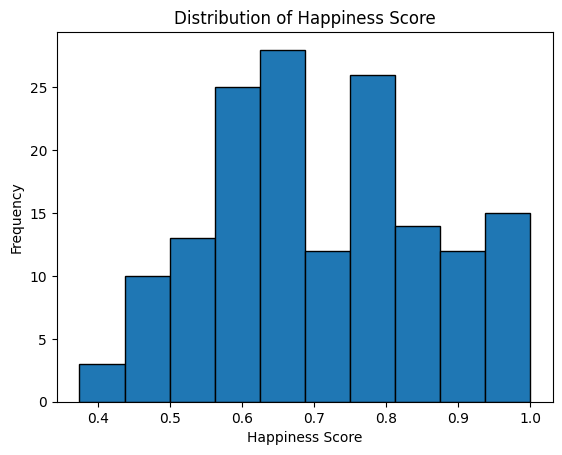

In [73]:
import matplotlib.pyplot as plt

# Histogram of Happiness Score
plt.hist(data['Happiness Score'], bins=10, edgecolor='black')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Score')
plt.show()

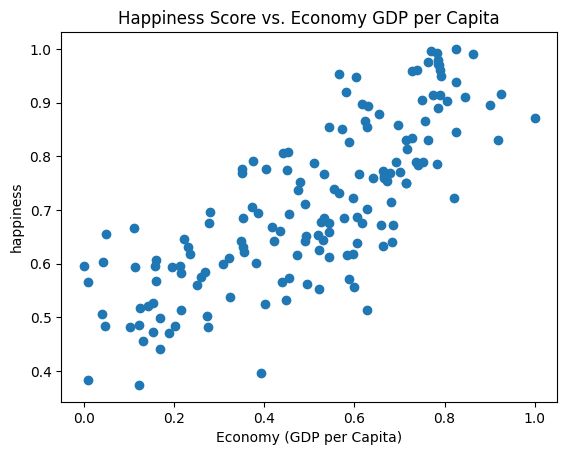

In [74]:
# Scatter plot: Happiness Score vs. Economy GDP per Capita
plt.scatter(data['Economy (GDP per Capita)'], data['Happiness Score'])
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('happiness')
plt.title('Happiness Score vs. Economy GDP per Capita')
plt.show()

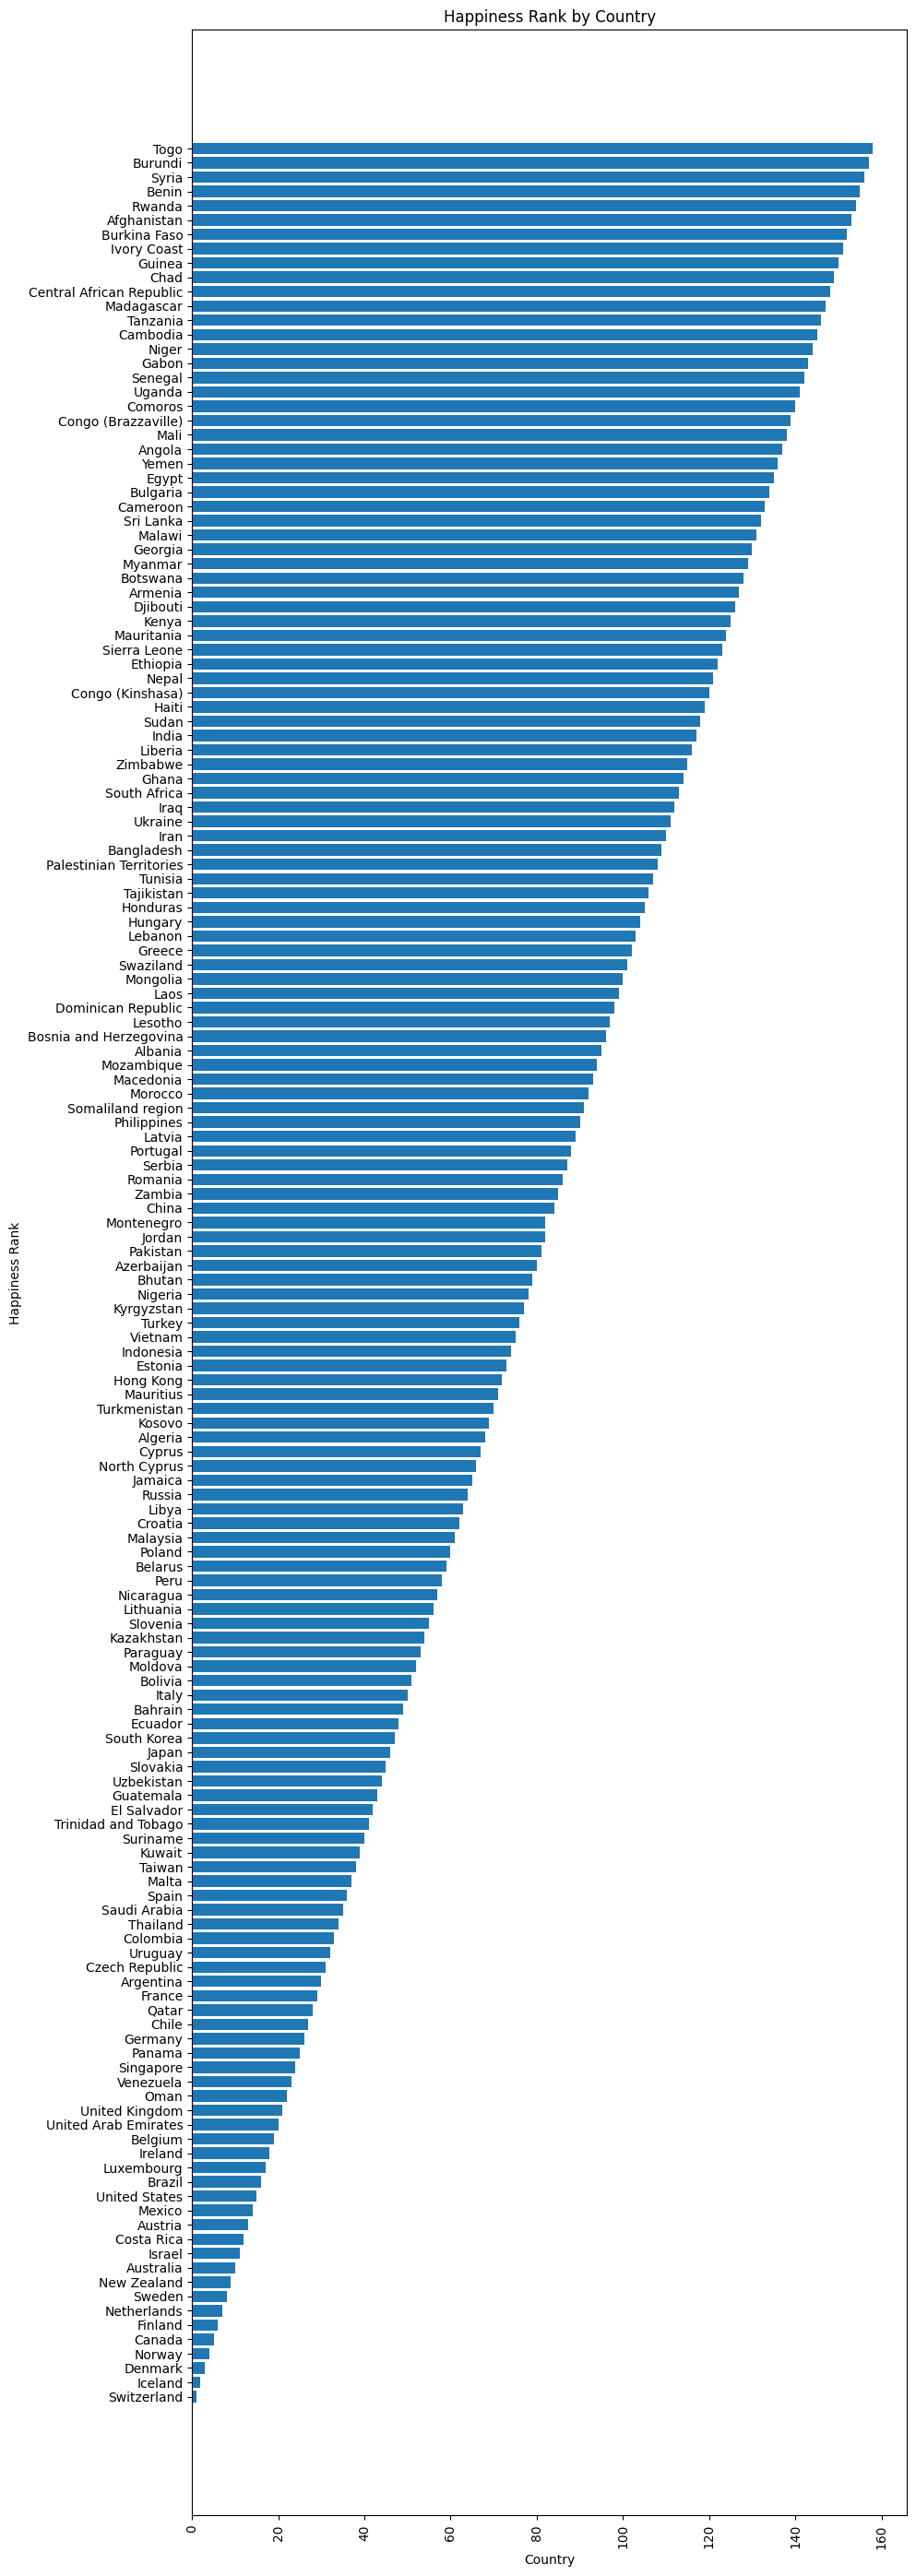

In [75]:
# Bar chart: Happiness Rank by Country
plt.figure(figsize=(10, 35))
df_sorted = data.sort_values('Happiness Rank', ascending=True)
plt.barh(df_sorted['Country'], df_sorted['Happiness Rank'])
plt.xlabel('Country')
plt.ylabel('Happiness Rank')
plt.title('Happiness Rank by Country')
plt.xticks(rotation=90)
plt.show()

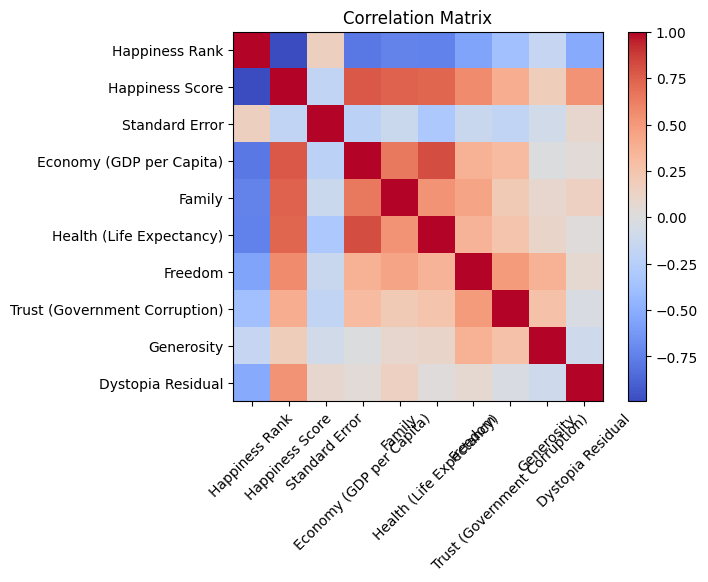

In [76]:
# Correlation matrix
corData = data.drop(['Country', 'Region'], axis=1)
corr_matrix = corData.corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

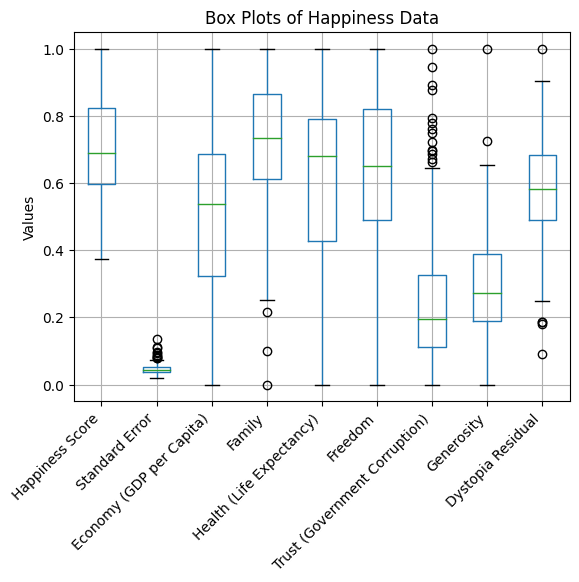

In [77]:
# Data distribution and Outliers

boxplot = data.boxplot(column=['Happiness Score', 'Standard Error',
                               'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                               'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'])

boxplot.set_xticklabels(['Happiness Score', 'Standard Error',
                         'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                         'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
                        rotation=45, ha="right")

plt.title('Box Plots of Happiness Data')
plt.ylabel('Values')
plt.show()

In [78]:
data = data.drop(["Country", 'Region', 'Standard Error', 'Trust (Government Corruption)'], axis=1)
data.head(10)

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Dystopia Residual
0,1,1.000000,0.826132,0.962403,0.918244,0.993789,0.372895,0.698857
1,2,0.996573,0.770412,1.000000,0.924496,0.938841,0.548198,0.750112
2,3,0.992092,0.784113,0.970297,0.853099,0.969615,0.428947,0.691822
3,4,0.991433,0.863099,0.949167,0.863409,1.000000,0.435983,0.684401
4,5,0.978911,0.784592,0.943219,0.883326,0.945112,0.575602,0.680640
5,6,0.976143,0.763272,0.940117,0.867213,0.958132,0.293399,0.727220
6,7,0.972453,0.786455,0.912953,0.870851,0.919415,0.598206,0.684510
7,8,0.970608,0.787798,0.919300,0.888437,0.985173,0.455621,0.658273
8,9,0.960327,0.739568,0.941122,0.885999,0.954683,0.596836,0.628585
9,10,0.960063,0.788905,0.933677,0.908617,0.972392,0.547344,0.629198


In [79]:
normalized_data = data[np.abs(stats.zscore(data['Generosity'])) < 3]

In [80]:
normalized_data = data[~((data-data.mean()).abs() > 3*data.std())]

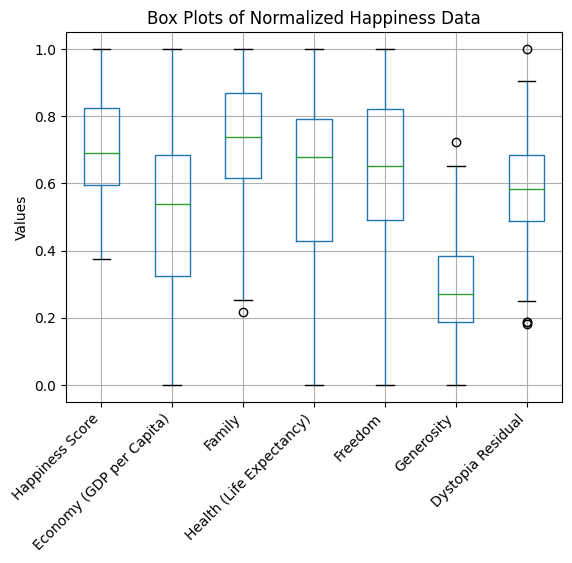

In [81]:
# Data distribution and Outliers

boxplot = normalized_data.boxplot(column=['Happiness Score',
                               'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                               'Freedom', 'Generosity', 'Dystopia Residual'])

boxplot.set_xticklabels(['Happiness Score',
                         'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                         'Freedom', 'Generosity', 'Dystopia Residual'],
                        rotation=45, ha="right")

plt.title('Box Plots of Normalized Happiness Data')
plt.ylabel('Values')
plt.show()

In [82]:
data.head(10)

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Dystopia Residual
0,1,1.000000,0.826132,0.962403,0.918244,0.993789,0.372895,0.698857
1,2,0.996573,0.770412,1.000000,0.924496,0.938841,0.548198,0.750112
2,3,0.992092,0.784113,0.970297,0.853099,0.969615,0.428947,0.691822
3,4,0.991433,0.863099,0.949167,0.863409,1.000000,0.435983,0.684401
4,5,0.978911,0.784592,0.943219,0.883326,0.945112,0.575602,0.680640
5,6,0.976143,0.763272,0.940117,0.867213,0.958132,0.293399,0.727220
6,7,0.972453,0.786455,0.912953,0.870851,0.919415,0.598206,0.684510
7,8,0.970608,0.787798,0.919300,0.888437,0.985173,0.455621,0.658273
8,9,0.960327,0.739568,0.941122,0.885999,0.954683,0.596836,0.628585
9,10,0.960063,0.788905,0.933677,0.908617,0.972392,0.547344,0.629198


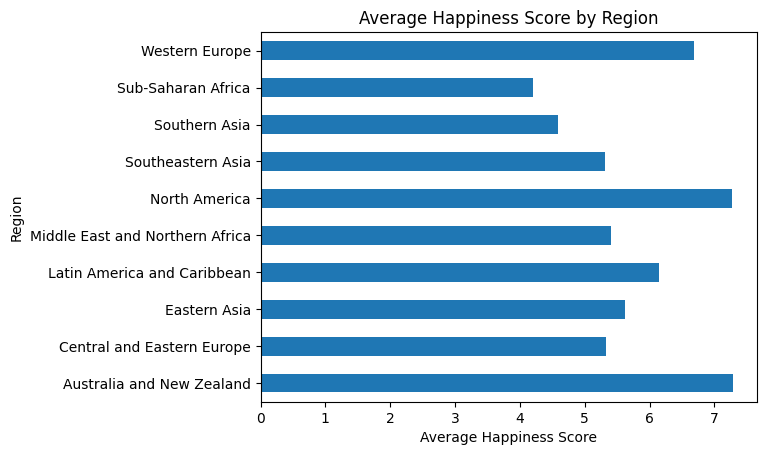

In [83]:
# 1. How does the Happiness Score vary across different regions?
data2 = pd.read_csv(path)
data2.groupby('Region')['Happiness Score'].mean().plot(kind='barh')
plt.ylabel('Region')
plt.xlabel('Average Happiness Score')
plt.title('Average Happiness Score by Region')
plt.show()

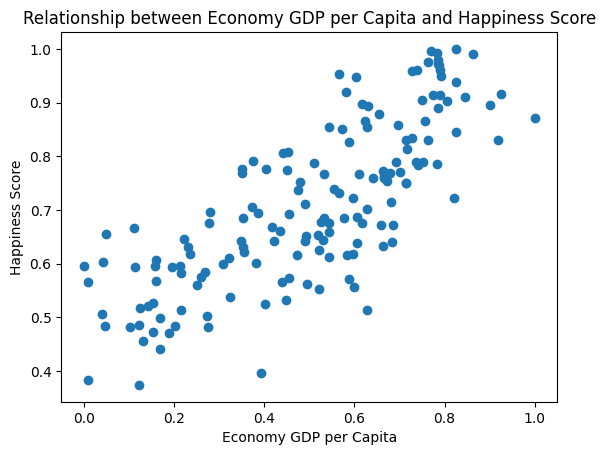

In [84]:
# 2. What is the relationship between Economy GDP per Capita and Happiness Score?
plt.scatter(data['Economy (GDP per Capita)'], data['Happiness Score'])
plt.xlabel('Economy GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Relationship between Economy GDP per Capita and Happiness Score')
plt.show()

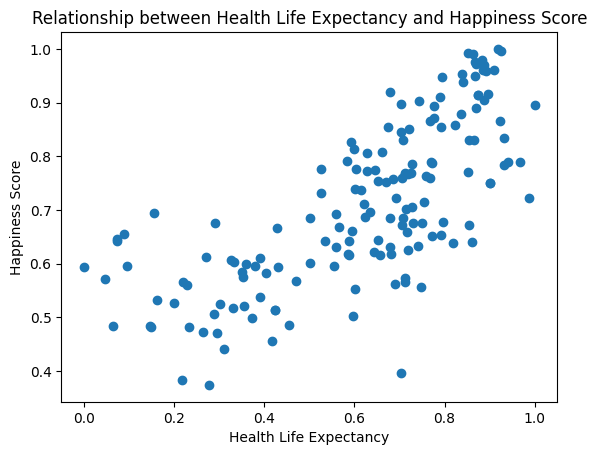

In [85]:
# 3. Is there a correlation between Health Life Expectancy and Happiness Score?
plt.scatter(data['Health (Life Expectancy)'], data['Happiness Score'])
plt.xlabel('Health Life Expectancy')
plt.ylabel('Happiness Score')
plt.title('Relationship between Health Life Expectancy and Happiness Score')
plt.show()

In [86]:
# 4. Countries with highest and lowest happiness score
highest_happiness = data2.loc[data['Happiness Score'].idxmax()]
lowest_happiness = data2.loc[data['Happiness Score'].idxmin()]
print(f"Highest Happiness Score: {highest_happiness['Country']} : {highest_happiness['Happiness Score']}")
print(f"Lowest Happiness Score: {lowest_happiness['Country']} : {lowest_happiness['Happiness Score']}")

Highest Happiness Score: Switzerland : 7.587
Lowest Happiness Score: Togo : 2.839


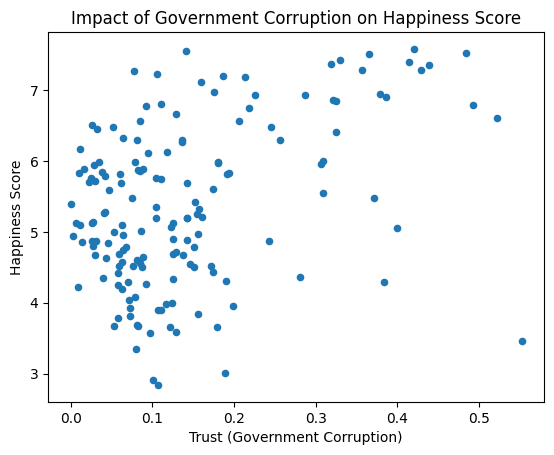

In [87]:
# 5. Does the level of Government Corruption (Trust) impact the Happiness Score?
data2.plot(x='Trust (Government Corruption)', y='Happiness Score', kind='scatter')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')
plt.title('Impact of Government Corruption on Happiness Score')
plt.show()

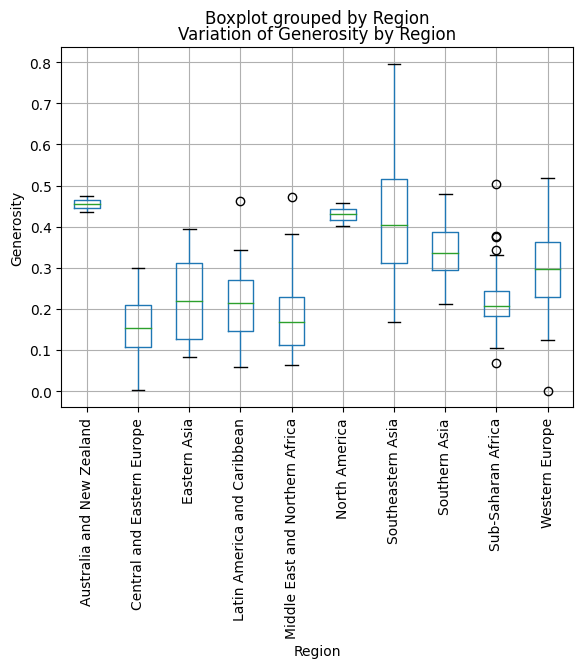

In [88]:
# 6. How does the level of Generosity vary across different regions?
data2.boxplot(column='Generosity', by='Region')
plt.xlabel('Region')
plt.ylabel('Generosity')
plt.title('Variation of Generosity by Region')
plt.xticks(rotation = 90)
plt.show()

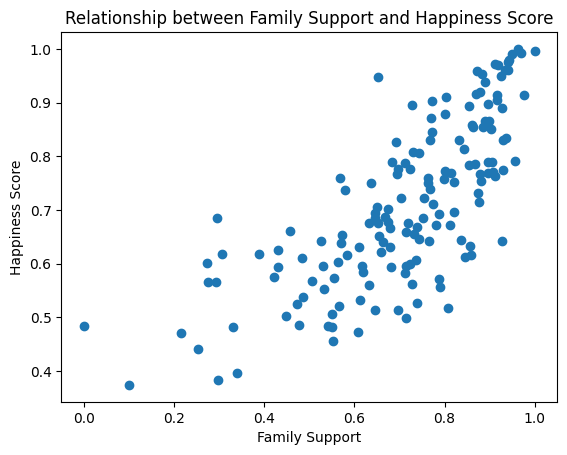

In [89]:
# 7. Is there a relationship between Family support and Happiness Score?
plt.scatter(data['Family'], data['Happiness Score'])
plt.xlabel('Family Support')
plt.ylabel('Happiness Score')
plt.title('Relationship between Family Support and Happiness Score')
plt.show()

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

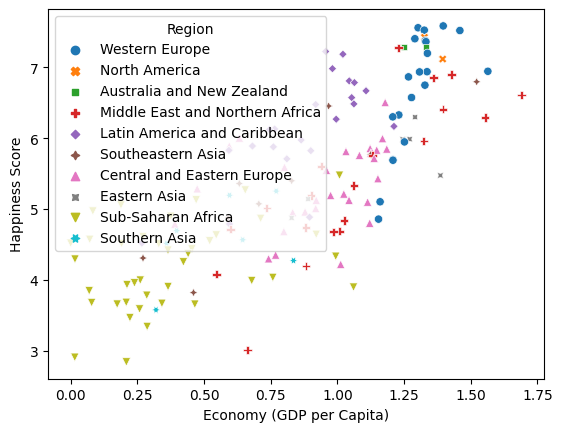

In [90]:
import seaborn as sns
sns.scatterplot(data=data2, x=data2['Economy (GDP per Capita)'], y=data2['Happiness Score'],hue="Region",style="Region")

A Title for the charts below

<Axes: ylabel='Family'>

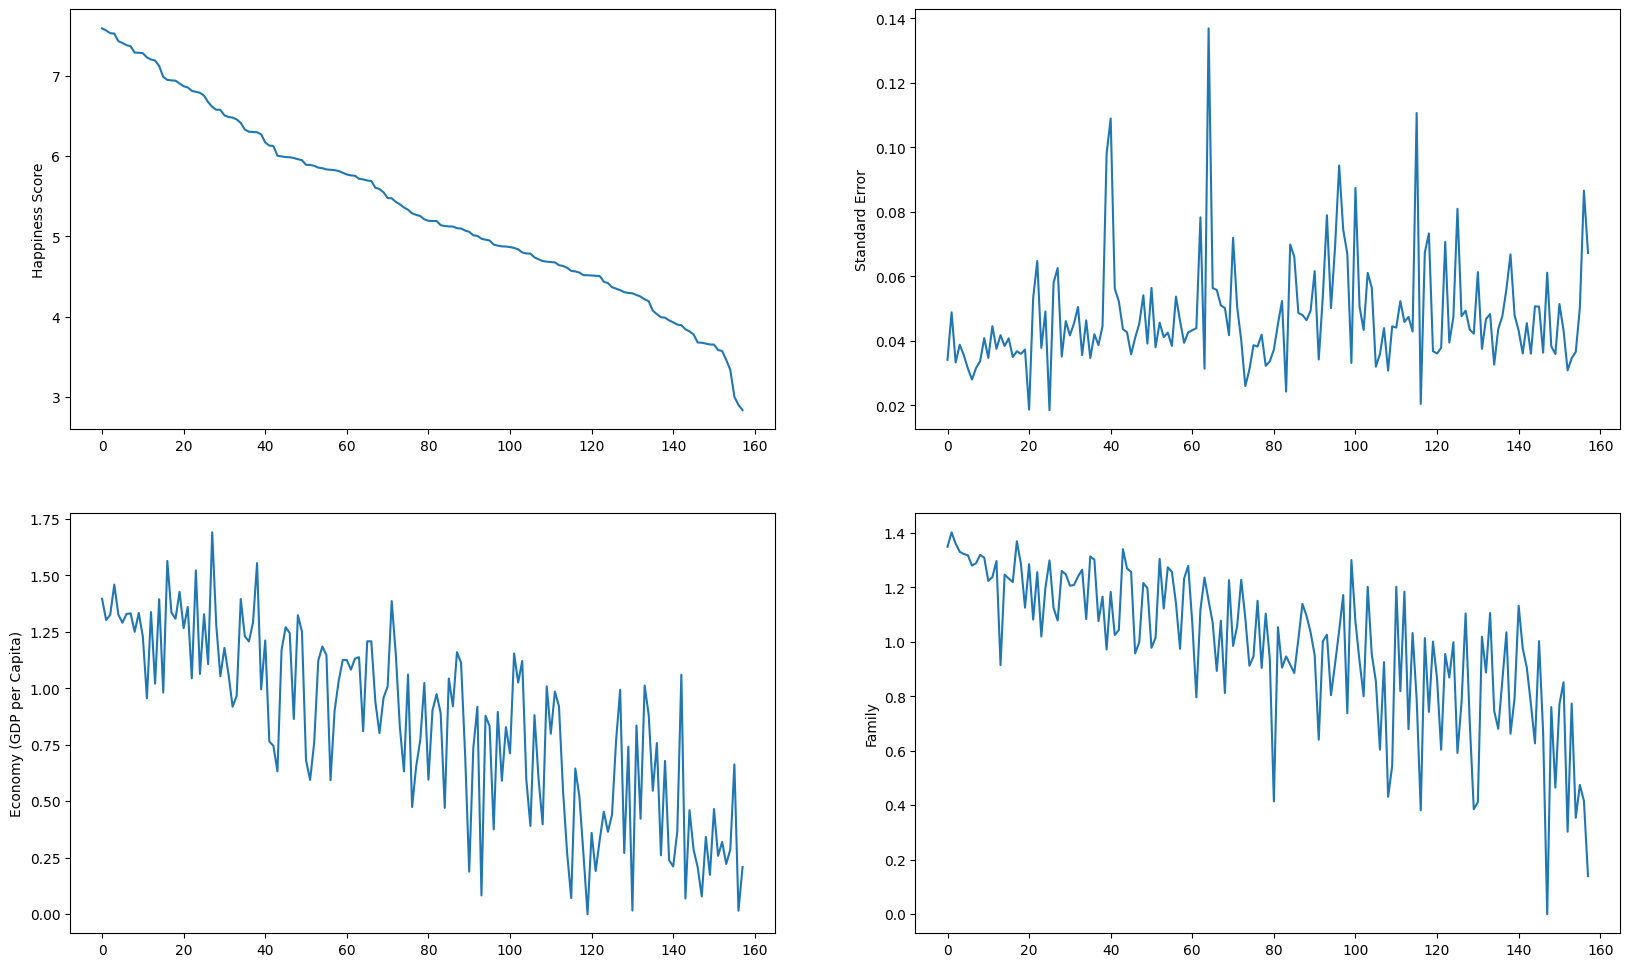

In [91]:

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.lineplot(data2['Happiness Score'])
plt.subplot(2,2,2)
sns.lineplot(data2['Standard Error'])
plt.subplot(2,2,3)
sns.lineplot(data2['Economy (GDP per Capita)'])
plt.subplot(2,2,4)
sns.lineplot(data2['Family'])

<Axes: ylabel='Generosity'>

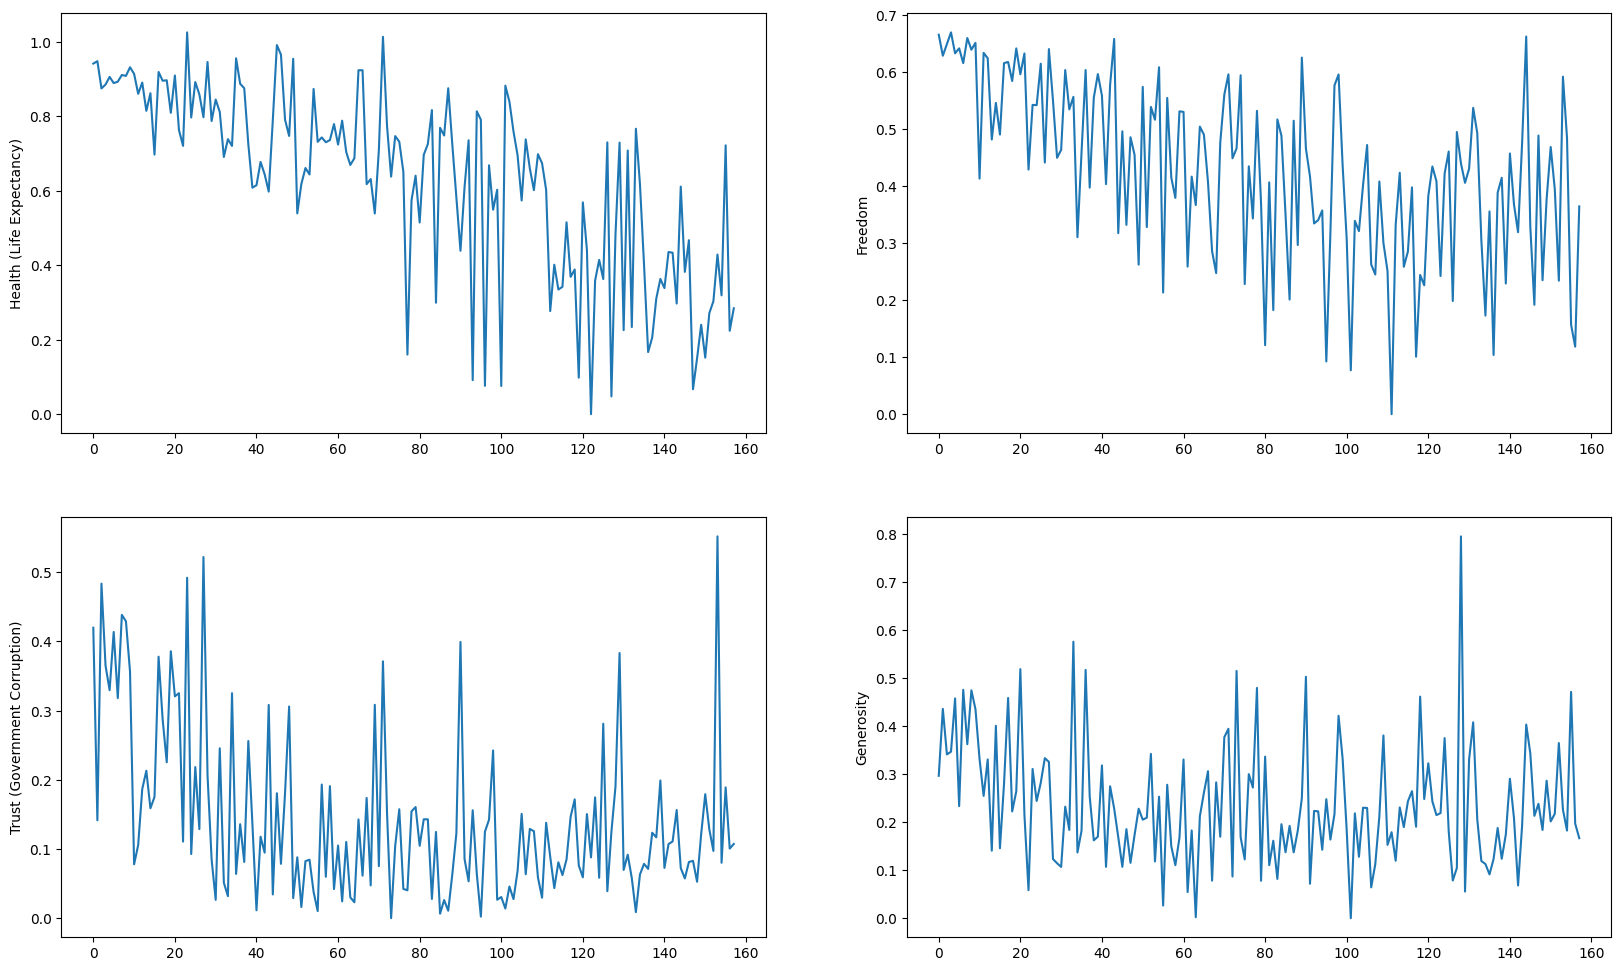

In [92]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.lineplot(data2['Health (Life Expectancy)'])
plt.subplot(2,2,2)
sns.lineplot(data2['Freedom'])
plt.subplot(2,2,3)
sns.lineplot(data2['Trust (Government Corruption)'])
plt.subplot(2,2,4)
sns.lineplot(data2['Generosity'])

<Axes: ylabel='Happiness Rank'>

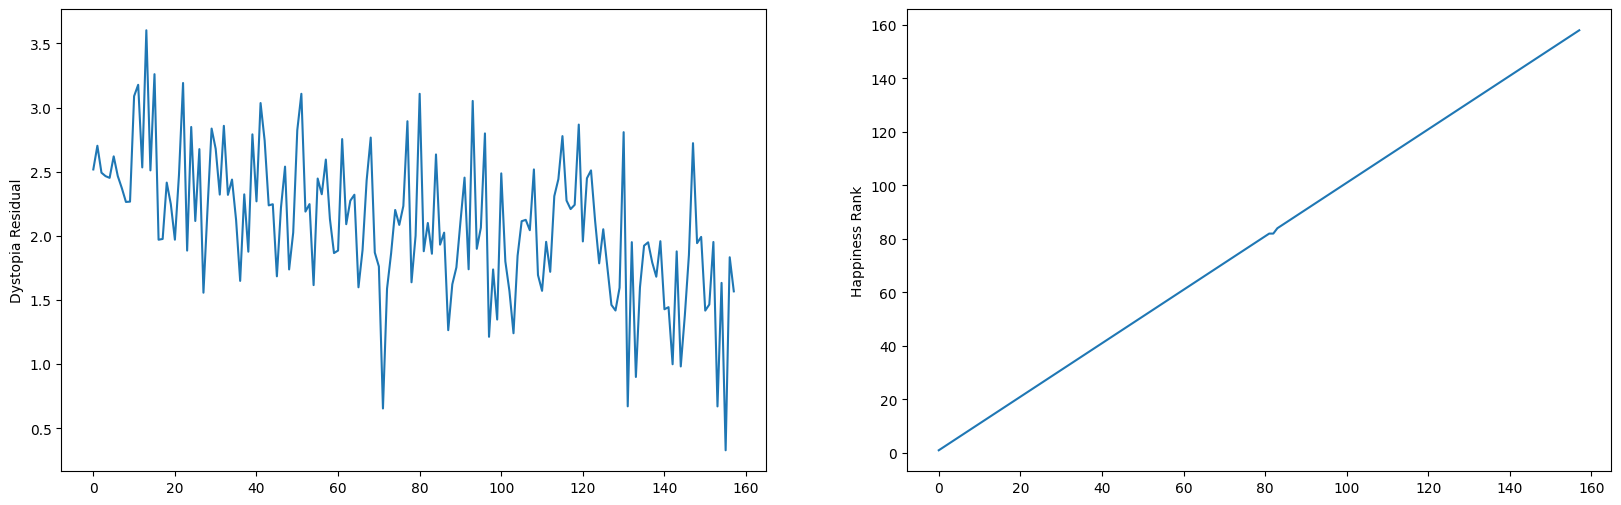

In [93]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.lineplot(data2['Dystopia Residual'])
plt.subplot(1,2,2)
sns.lineplot(data2['Happiness Rank'])